# Exploration

In [4]:
PATH_TREEBANK = "../data/sud_naija-NSC.with_prediction.conllu"

In [5]:
# le fichier est t-il bien présent ?
try:
    with open(PATH_TREEBANK, "r") as f:
        print("Le fichier est présent au chemin : {}".format(PATH_TREEBANK))
        pass
except FileNotFoundError:
    print("Le fichier n'est PAS , revoyez le chemin : {}".format(PATH_TREEBANK))
    exit()

Le fichier est présent au chemin : ../data/sud_naija-NSC.with_prediction.conllu


In [6]:
# On peut commencer à parser le fichier avec la librairie conllup
from conllup.conllup import readConlluFile 
sentences = readConlluFile(PATH_TREEBANK)

if len(sentences) == 0:
    raise ValueError("Le fichier est vide !")
else :
    print("Le fichier contient {} phrases".format(len(sentences)))

Le fichier contient 8259 phrases


In [8]:
# A quoi ressemble notre objet "sentence"
import json
print(json.dumps(sentences[0], indent=4)) 

{
    "metaJson": {
        "sent_id": "IBA_01_Fola-Lifestory_MG__1",
        "sound_url": "http://www.tal.univ-paris3.fr/trameur/iTrameur-naija/mp3/IBA_01_Fola-Lifestory_MG.mp3",
        "speaker_id": "Sp360",
        "text": "life for me as small pikin dey hard small o //",
        "text_en": "Life for me as a child was a bit hard.",
        "text_ortho": "Life for me as small pikin dey hard small o.",
        "timestamp": "1591368564.075782"
    },
    "treeJson": {
        "nodesJson": {
            "1": {
                "ID": "1",
                "FORM": "life",
                "LEMMA": "life",
                "UPOS": "NOUN",
                "XPOS": "_",
                "FEATS": {},
                "HEAD": 7,
                "DEPREL": "subj",
                "DEPS": {},
                "MISC": {
                    "AlignBegin": "1580",
                    "AlignEnd": "1950",
                    "Gloss": "life",
                    "deprel_main_pred": "subj",
                    

Nous pouvons retrouver, dans `sentence["metaJson"]`, les meta-informations des phrases du conllu :
- `sent_id`: identifiant de la phrase dans le treebank.
- `sound_url`: lien url de l'audio de la phrase (ce treebank NaijaSynCor est un corpus oral) .
- `speaker_id`: identifiant (anonymisé) du locuteur.
- `text`: version "prosodique" du texte. Les ponctuations sont plus riches et des marqueurs prosodiques (retranscrivant l'oral) sont ajoutés.
- `text_en`: traduction anglaise.
- `text_ortho`: version littéraire du texte.
- `timestamp`: date de la dernière annotation.


In [9]:
# voici donc ces meta-données seulement
print(json.dumps(sentences[0]['metaJson'], indent=4)) 

{
    "sent_id": "IBA_01_Fola-Lifestory_MG__1",
    "sound_url": "http://www.tal.univ-paris3.fr/trameur/iTrameur-naija/mp3/IBA_01_Fola-Lifestory_MG.mp3",
    "speaker_id": "Sp360",
    "text": "life for me as small pikin dey hard small o //",
    "text_en": "Life for me as a child was a bit hard.",
    "text_ortho": "Life for me as small pikin dey hard small o.",
    "timestamp": "1591368564.075782"
}


In [10]:
# Comment accéder aux tokens ?
# ils sont imbriqués dans sentence['treeJson']['nodesJson']
sentence_tokens = sentences[0]['treeJson']['nodesJson']
print(json.dumps(sentence_tokens, indent=4))


{
    "1": {
        "ID": "1",
        "FORM": "life",
        "LEMMA": "life",
        "UPOS": "NOUN",
        "XPOS": "_",
        "FEATS": {},
        "HEAD": 7,
        "DEPREL": "subj",
        "DEPS": {},
        "MISC": {
            "AlignBegin": "1580",
            "AlignEnd": "1950",
            "Gloss": "life",
            "deprel_main_pred": "subj",
            "head_MST": "2",
            "upostag": "NOUN"
        }
    },
    "2": {
        "ID": "2",
        "FORM": "for",
        "LEMMA": "for",
        "UPOS": "ADP",
        "XPOS": "_",
        "FEATS": {},
        "HEAD": 1,
        "DEPREL": "mod",
        "DEPS": {},
        "MISC": {
            "AlignBegin": "1950",
            "AlignEnd": "2180",
            "Gloss": "for",
            "deprel_main_pred": "root",
            "head_MST": "0",
            "upostag": "ADP"
        }
    },
    "3": {
        "ID": "3",
        "FORM": "me",
        "LEMMA": "me",
        "UPOS": "PRON",
        "XPOS": "_",
      

In [11]:
# Les tokens sont donc dans un dictionnaire avec comme clé l'ID du token 
# et comme valeur un dictionnaire avec les informations du token

# Regardons le premier token
print(json.dumps(sentence_tokens['1'], indent=4))

{
    "ID": "1",
    "FORM": "life",
    "LEMMA": "life",
    "UPOS": "NOUN",
    "XPOS": "_",
    "FEATS": {},
    "HEAD": 7,
    "DEPREL": "subj",
    "DEPS": {},
    "MISC": {
        "AlignBegin": "1580",
        "AlignEnd": "1950",
        "Gloss": "life",
        "deprel_main_pred": "subj",
        "head_MST": "2",
        "upostag": "NOUN"
    }
}


Voici la composition d'un token au format json (voir [spécifications officielles ici](https://universaldependencies.org/format.html) )
- `ID`: Identifiant du token dans la phrase,
- `FORM`: Forme du token,
- `LEMMA`: Lemme du token,
- `UPOS`: Catégorie du discours universelle (Universal Part Of Speech)
- `XPOS`: Catégorie du discours **optionnelle**
- `FEATS`: Liste de features morphologiques de l'inventaire universel ou d'une extension spécifique à la langue
- `HEAD`: Identifiant du gouverneur du token (0 si le token est la tête de la phrase)
- `DEPREL`: Relation de dépendance avec le gouverneur (`root` si le token est la tête de la phrase)
- `DEPS`: Graphes de dépendances améliorés sous la forme d'une liste de paires tête-déprel 
- `MISC`: Toutes les autres données non universelles peuvent être insérées dans cet objet MISC. Voici quelques exemples de valeur misc
    - `AlignBegin`: alignement temporelle **du début** du token dans l'audio de la phrase (en milliseconde)
    - `AlignEnd`: alignement temporelle de **la fin** du token dans l'audio de la phrase (en milliseconde),
    - `Gloss`: glose anglaise
    - `deprel_main_pred`: Relation de dépendance **prédite**,
    - `head_MST`: Identifiant **prédit** du gouverneur,
    - `upostag`: Catégorie du dicours **prédit**


In [12]:
# Maintenant qu'on connait la structure, on peut compter le nombre de tokens dans tous le corpus
nb_tokens = 0
for sentence in sentences:
    nb_tokens += len(sentence['treeJson']['nodesJson'])
print("Le corpus contient {} tokens".format(nb_tokens))



Le corpus contient 131042 tokens


In [13]:
# calculons le nombre de tokens par phrase en moyenne dans ce corpus
nb_tokens = 0
for sentence in sentences:
    nb_tokens += len(sentence['treeJson']['nodesJson'])
print("Le corpus contient {} tokens".format(nb_tokens))
print("Le corpus contient {} phrases".format(len(sentences)))
print("Le nombre moyen de tokens par phrase est de {}".format(nb_tokens/len(sentences)))

Le corpus contient 131042 tokens
Le corpus contient 8259 phrases
Le nombre moyen de tokens par phrase est de 15.866569802639544


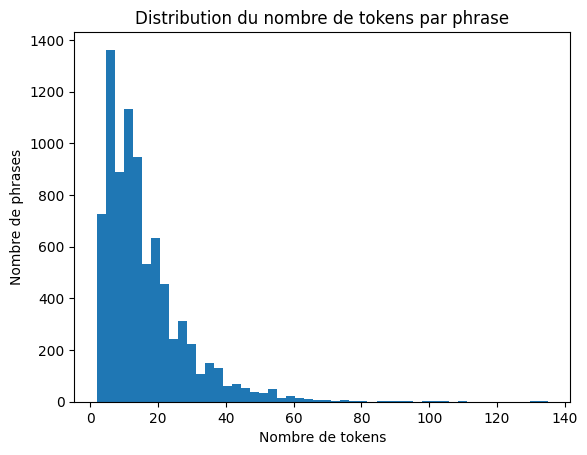

In [18]:
# Affichons la distribution des tokens par phrase
import matplotlib.pyplot as plt
tokens_per_sentence = []
for sentence in sentences:
    tokens_per_sentence.append(len(sentence['treeJson']['nodesJson']))
plt.hist(tokens_per_sentence, bins=50)
plt.title("Distribution du nombre de tokens par phrase")
plt.xlabel("Nombre de tokens")
plt.ylabel("Nombre de phrases")
plt.show()

In [21]:
import matplotlib as mpl

params = {
   'axes.labelsize': 8,
 #  'text.fontsize': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [10, 5]
   }
mpl.rcParams.update(params)

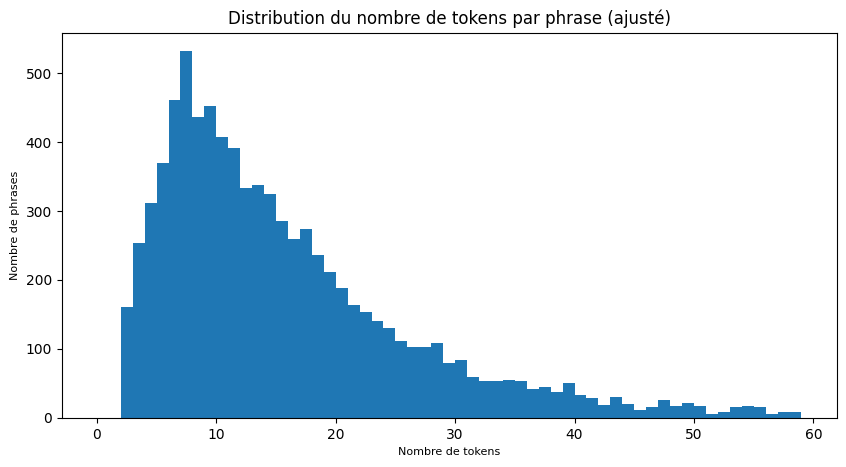

In [22]:
# On peut faire un peu plus joli
tokens_per_sentence = []
for sentence in sentences:
    tokens_per_sentence.append(len(sentence['treeJson']['nodesJson']))
plt.hist(tokens_per_sentence, bins=range(0, 60))
plt.title("Distribution du nombre de tokens par phrase (ajusté)")
plt.xlabel("Nombre de tokens")
plt.ylabel("Nombre de phrases")
plt.show()

In [15]:
# Calculons le nombre de nom propre/nom commun par phrase en moyenne dans ce corpus

In [16]:
# Calculons le nombre de nom verbe par phrase en moyenne dans ce corpus
